# Neural Network 
- Human brain works with biological neurone. Ability of machine to recognize things like digits, objects on its own is known as neural network.
- Multiple neurons are combined to form a neural network.

## Anatomy of Neural Network
- There are three layers
1. Input layer --> It takes pixles as input from images.
2. Hidden layer --> Doing computation and extracting features
3. Output layer --> Provides the prediction (i.e 0-9)

- Key Concepts
1. Weight(w): Learnable parameters controlling input importance.
2. Bias (b): shift the activation function curve.
3. Activation function: Change to non-linearity (e.g ReLU, Sigmoid, tanh, etc.)
4. Loss function: Measures how wrong our model 
5. Optimizers: Adjust the weight to minimize loss (SGS, Adam, etc)

- Math behind Neural Network
 - x(i) --> input
 - w(i) --> weight
 - b -->bias
 - z --> weighted sum

 - z = w1x1+w2x2+...+wnxn +b
 - Activation function
   a = f(z)

   - If you use ReLU
   f (z) = max(0,z)



# Classification of digits using NN

## MINST:(70k images datas for handwritten digits (0-9))
 - 28*28 size images garyscales pixel
 - Train = 60K
 - Test = 10K

## Preprocessing MINST dataset
- Before feeding the neural network 
- Flattern 28*28: 784 input features (for dense layer) or keep as 28*28 is we are using CNN

- Normalization: Divide value by 255 to get in range [0,1]
- One-hot Encoding: For eg. [0 0 0 1 0 0 0 0 0 0]


# MNIST dataset Training and Testing and Evaluation

## Neural Netwrok Architecture
- Input: 784 neurons
- Hidden Layer: 128 neurons (ReLU)
- Hidden Layer: 64 neurons (ReLU)
- Output: 10 neurons (0-9)

# For training
1. Initialize weight randonmly 
2. Forward pass: Compute prediction
3. Calculate loss: 
   - Summation (y log (ycap))
4. Backpropagration error
5. Updated weight 
6. Repeat it for many epochs until convergances


# Challenges
1. Overfitting: <br>
    Model memorizes training data but fails with new images data <br>
    Solution: Dropout, regularization

2. Underfitting: <br>
    Model too simple (less datasets)

3. Learning rate tuning:<br>
    too high = unstable<br>
    too low = slow


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical



(60000, 28, 28)
(10000, 28, 28)


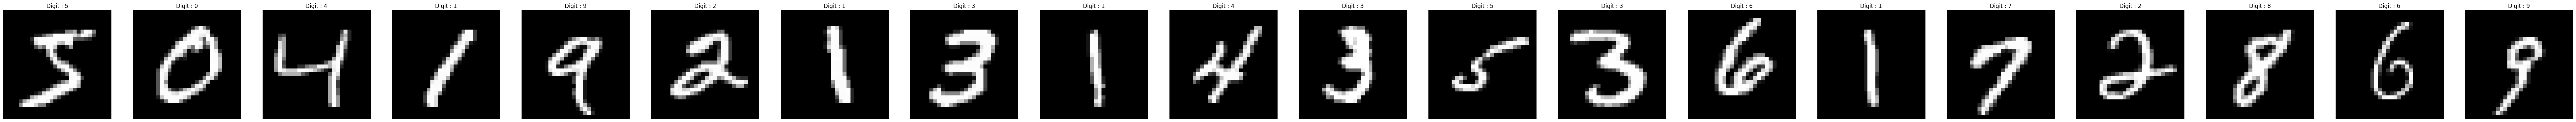

In [10]:
# load dataset and let's visualize it
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print (x_test.shape)

# Digit
# plt.imshow(x_train[0], cmap='gray')
# plt.title(f"Digit : {y_train[0]}")
# plt.show()

plt.figure(figsize=(100,20))
for i in range(20):
   plt.subplot(1, 20, i+1)
   plt.imshow(x_train[i], cmap='gray')
   plt.title(f"Digit : {y_train[i]}")
   plt.axis('off')
plt.show()
   



In [12]:
# Data preprocessing 
 
# Normalization
x_train = x_train/255
x_test = x_test/255

# On hot encoding 

y_train_cat= to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

print(y_train_cat)
print(y_test_cat)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
# Build a feed forward neural network 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
model = Sequential([
    # Flatten layer 2D shape convert it into 784 (1D)
    Input(shape=(28,28)),
    Flatten(),

    # First hidden Layer
    Dense(128, activation='relu'),

    # Second hidden layer
    Dense(64, activation='relu'),

    # output
    Dense(10,activation='softmax')
])



In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  
              metrics=['accuracy'])              

model.summary()

In [ ]:
# train the model
 

history = model.fit(
    x_train,           
    y_train_cat,       
    epochs=10,
    batch_size=128,
    validation_split=0.1
)


In [ ]:
# model evaluation
loss, accuracy = model.evaluate(x_test,y_test_cat)

print(f"Test accuracy {accuracy} and loss value: {loss}")


In [ ]:
# plotting the model 

plt.plot(history.history['accuracy'], label = "Training Accuracy Curve")
plt.plot(history.history['val_accuracy'], label= "Value Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Curve")
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
# predict and Visualized
prediction=model.predict(x_test)
for i in range(5):
    plt.imshow(x_test[i],cmap='gray')
    plt.title(f"Actual :{y_test[i]} | predict:{prediction[i]}")
    plt.axis('off')
    plt.show()